# Setup

In [22]:
from keras.preprocessing.text import Tokenizer
import sklearn.metrics.pairwise

import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Read preprocessed CSV file
df = pd.read_csv("all_letters.csv", sep="\t", header=None)
df.columns = ["Nb", "Author", "Content"]

# Analysis 1: Do letters become "more similar" to each other over time?

In [111]:
# Tokenise strings; this includes conversion to lowercase
model = Tokenizer()
model.fit_on_texts(df.Content)

# Extract bags-of-words from the model
# We remove the first column of the bag-of-words, as this seems to be empty all the time
bag_of_words = model.texts_to_matrix(df.Content, mode='count')
bag_of_words = bag_of_words[:,1:]

In [112]:
# Retain only words with at least 'cutoff' letters
# TODO: We might want to use a list of stop words to remove as well...
cutoff = 3

word_index = model.word_index
tokens = np.array(list(word_index.keys()))
lengths = np.array(list(map(lambda w: len(w), tokens)))
bag_of_words = bag_of_words[:, lengths>=cutoff]

<AxesSubplot:>

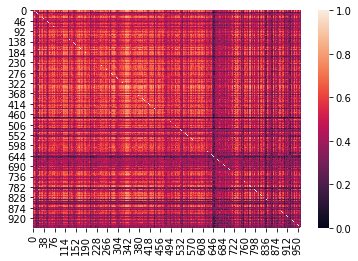

In [113]:
# Compute cosine similarity matrix on the individual letters (i.e. vectors)
X = bag_of_words.copy()
cosinesim = sklearn.metrics.pairwise.cosine_similarity(X)

# Plot it
sns.heatmap(cosinesim)

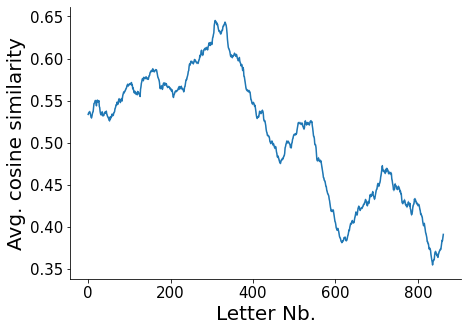

In [114]:
# We now slide a window of size 'window_size' over the 963 letters
# and compute the average pairwise cosine similarity 
window_size = 100

avg_similarities = []
se_similarities = []
nb_letter = range(0, len(cosinesim)-window_size)
for i in nb_letter:
    # Extract the similarity values from the triangular submatrix
    # from i to i+windowsize, excluding the 1s on diagonal
    submatrix = cosinesim[i:i+window_size,i:i+window_size]
    similarities = submatrix[np.triu_indices(window_size, k=1)]
    
    # Compute avg and sem
    avg_similarities.append(np.mean(similarities))
    se_similarities.append(sp.stats.sem(similarities))
avg_similarities = np.array(avg_similarities)
se_similarities = np.array(se_similarities)

# Generate plot and make visually more pleasing
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.set_xlabel("Letter Nb.", size=20)
ax.set_ylabel("Avg. cosine similarity", size=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.plot(nb_letter, avg_similarities)
ax.fill_between(nb_letter, avg_similarities-se_similarities, avg_similarities+se_similarities, alpha=.5)

# Repeat Analysis 1 with normed word counts

<AxesSubplot:>

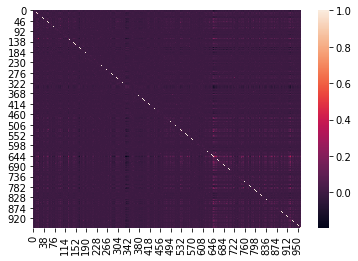

In [115]:
# Norm word counts across letters from previous section
X_normed = (X - X.mean(axis=0)) / X.std(axis=0)

# Compute pairwise cosine similarities
cosinesim_normed = sklearn.metrics.pairwise.cosine_similarity(X_normed)

# And plot similarity matrix
sns.heatmap(cosinesim_normed)

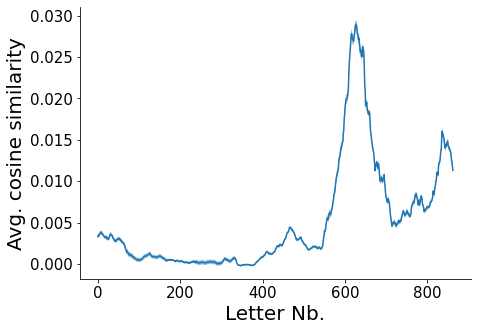

In [116]:
# Same code as in previous section, however now operating on 'cosinesim_normed'
window_size = 100

avg_similarities = []
se_similarities = []
nb_letter = range(0, len(cosinesim)-window_size)
for i in nb_letter:
    # Extract the similarity values from the triangular submatrix
    # from i to i+windowsize, excluding the 1s on diagonal
    submatrix = cosinesim_normed[i:i+window_size,i:i+window_size]  #changed this
    similarities = submatrix[np.triu_indices(window_size, k=1)]
    
    # Compute avg and sem
    avg_similarities.append(np.mean(similarities))
    se_similarities.append(sp.stats.sem(similarities))
avg_similarities = np.array(avg_similarities)
se_similarities = np.array(se_similarities)

# Generate plot and make visually more pleasing
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.set_xlabel("Letter Nb.", size=20)
ax.set_ylabel("Avg. cosine similarity", size=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.plot(nb_letter, avg_similarities)
ax.fill_between(nb_letter, avg_similarities-se_similarities, avg_similarities+se_similarities, alpha=.5)

# WIP -- TODO: Make this clean

<AxesSubplot:ylabel='Density'>

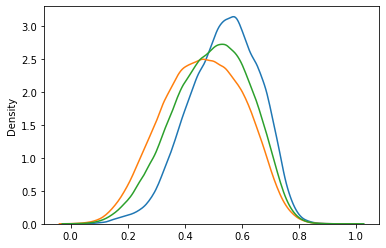

In [137]:
X_schillers = X[df.Author=="Schiller",:]
cosinesim_schillers = sklearn.metrics.pairwise.cosine_similarity(X_schillers)
similarities_schillers = cosinesim_schillers[np.triu_indices(len(cosinesim_schillers), k=1)]

X_goethes =  X[df.Author=="Goethe",:]
cosinesim_goethes = sklearn.metrics.pairwise.cosine_similarity(X_goethes)
similarities_goethes = cosinesim_goethes[np.triu_indices(len(cosinesim_goethes), k=1)]

similarities_all = cosinesim[np.triu_indices(len(cosinesim), k=1)]

sns.kdeplot(similarities_schillers)
sns.kdeplot(similarities_goethes)
sns.kdeplot(similarities_all)


<AxesSubplot:ylabel='Density'>

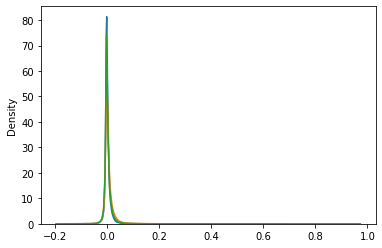

In [138]:
X_normed_schillers = X_normed[df.Author=="Schiller",:]
cosinesim_normed_schillers = sklearn.metrics.pairwise.cosine_similarity(X_normed_schillers)
similarities_normed_schillers = cosinesim_normed_schillers[np.triu_indices(len(cosinesim_normed_schillers), k=1)]

X_normed_goethes = X_normed[df.Author=="Goethe",:]
cosinesim_normed_goethes = sklearn.metrics.pairwise.cosine_similarity(X_normed_goethes)
similarities_normed_goethes = cosinesim_normed_goethes[np.triu_indices(len(cosinesim_normed_goethes), k=1)]


similarities_normed_all = cosinesim_normed[np.triu_indices(len(cosinesim_normed), k=1)]

sns.kdeplot(similarities_normed_schillers)
sns.kdeplot(similarities_normed_goethes)
sns.kdeplot(similarities_normed_all)
